In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib as plt
import seaborn as sns
import io
import cufflinks as cf
cf.go_offline()

%matplotlib inline

In [2]:
df1 = pd.read_csv('vaccine-data.csv')
#df = pd.read_csv("../input/housing2/vaccine-data.csv")
df.head()

In [3]:
df1.head(5)

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN         NaN                  NaN  ...   
2                 NaN           NaN         NaN                  NaN  ...   
3                 NaN           NaN         NaN                  NaN  ...   
4                 NaN           NaN         NaN                  NaN  ...   

   female_smokers  male_smokers  handwashing_facilities  \
0             NaN           NaN                  37.746   
1             NaN           NaN                  37.746   
2             NaN           NaN                  37.746   
3             NaN           NaN                  37.746   
4             NaN           NaN                  37.746   

   hospital_beds_per_thousand  life_expectancy  human_development_index  \
0                         0.5            64.83                    0.511   
1                         0.5            64.83                    0.511   
2                         0.5            64.83                    0.511   
3                         0.5            64.83                    0.511   
4                         0.5            64.83                    0.511   

   excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                   NaN                          NaN   
1                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   NaN                          NaN   
4                                   NaN                          NaN   

   excess_mortality  excess_mortality_cumulative_per_million  
0               NaN                                      NaN  
1               NaN                                      NaN  
2               NaN                                      NaN  
3               NaN                                      NaN  
4               NaN                                      NaN  

[5 rows x 67 columns]

In [4]:
print("########################################################################")
print("                       Info Of the Data Set")
print("########################################################################")
df1.info()

########################################################################
                       Info Of the Data Set
########################################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138255 entries, 0 to 138254
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    138255 non-null  object 
 1   continent                                   129456 non-null  object 
 2   location                                    138255 non-null  object 
 3   date                                        138255 non-null  object 
 4   total_cases                                 130585 non-null  float64
 5   new_cases                                   130580 non-null  float64
 6   new_cases_smoothed                          129540 non-null  float64
 7   total_deaths                

In [5]:
print("########################################################")
print("             NULL VALUES IN ASCENDING ORDER")
print("########################################################")

pd.options.display.min_rows = 115
df1.isnull().sum().sort_values(ascending=True)

########################################################
             NULL VALUES IN ASCENDING ORDER
########################################################


iso_code                                           0
location                                           0
date                                               0
population                                       986
total_cases                                     7670
new_cases                                       7675
total_cases_per_million                         8339
new_cases_per_million                           8344
new_cases_smoothed                              8715
new_deaths_smoothed                             8715
continent                                       8799
new_cases_smoothed_per_million                  9379
new_deaths_smoothed_per_million                 9379
life_expectancy                                 9716
population_density                             13113
diabetes_prevalence                            14875
gdp_per_capita                                 18294
human_development_index                        18756
new_deaths                                    

### **We may drop columns that are duplicated but with different scales (in hundreds, thousands...etc) as original values will be more accurate and helpful to our study**



In [ ]:
df1 = df1.drop(columns = ['total_cases_per_million', 
                          'new_cases_per_million', 
                          'total_deaths_per_million', 
                          'new_cases_smoothed_per_million', 
                          'new_deaths_smoothed_per_million',
                          'new_deaths_per_million',
                          'icu_patients_per_million', 
                          'hosp_patients_per_million', 
                          'weekly_icu_admissions_per_million', 
                          'weekly_hosp_admissions_per_million', 
                          'total_tests_per_thousand', 
                          'new_tests_per_thousand',
                          'new_tests_smoothed_per_thousand',
                          'total_vaccinations_per_hundred', 
                          'people_vaccinated_per_hundred', 
                          'people_fully_vaccinated_per_hundred', 
                          'total_boosters_per_hundred', 
                          'new_vaccinations_smoothed_per_million', 
                          'new_people_vaccinated_smoothed',
                          'new_people_vaccinated_smoothed_per_hundred',
                          'stringency_index', 'handwashing_facilities', 
                          'hospital_beds_per_thousand', 
                          'life_expectancy', 
                          'human_development_index', 
                          'excess_mortality_cumulative_per_million'])

<AxesSubplot:>

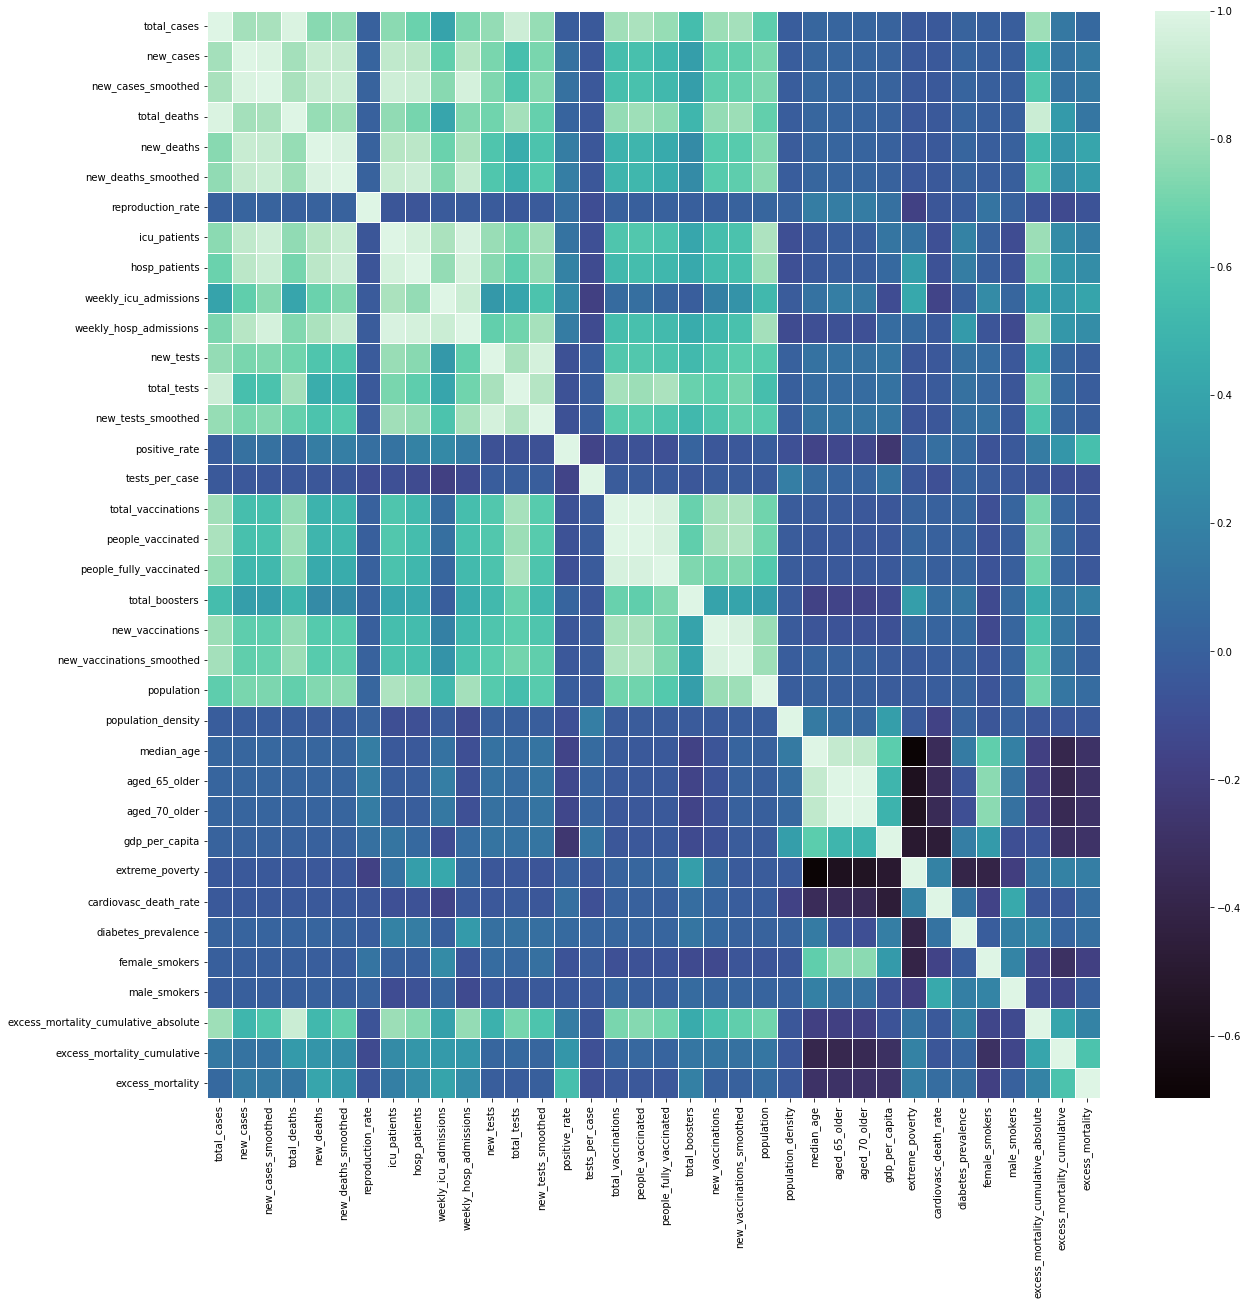

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,20))    
sns.heatmap(df1.corr(), annot=False, linewidths=.5, ax=ax, cmap = 'mako')


### From these informations we can already see that some features won't be relevant in our exploratory analysis, as there are too many missing values. Plus there is so much features to analyse that it may be better to concentrate on the ones which can give us real insights and have high correlation with the study we are onducting. most of the these features have NaN percentage of above 80% so it would be more helpful to drop them as well

In [20]:
df2 = df1.copy()          #keeping copy of the original data

df2 = df2.drop(columns = ['population_density',
                          'median_age', 
                          'aged_65_older', 
                          'aged_70_older', 
                          'gdp_per_capita', 
                          'extreme_poverty',
                          'cardiovasc_death_rate',
                          'diabetes_prevalence', 
                          'female_smokers', 
                          'male_smokers', 
                          'excess_mortality_cumulative', 
                          'excess_mortality',
                          'reproduction_rate',
                          'tests_per_case', 
                          'positive_rate', 
                          'new_cases_smoothed', 
                          'new_deaths_smoothed', 
                          'new_tests_smoothed'])

<AxesSubplot:>

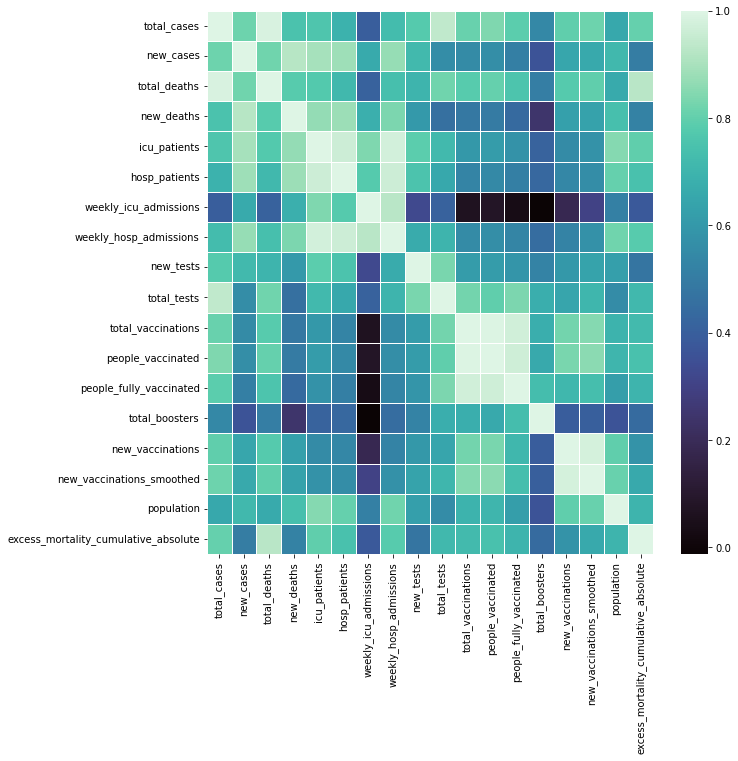

In [21]:
fig, ax = plt.subplots(figsize=(10,10))        
sns.heatmap(df2.corr(), annot=False, linewidths=.5, ax=ax, cmap = 'mako')


In [22]:
df2 = df2.drop(columns = ['total_boosters', 'excess_mortality_cumulative_absolute', 'weekly_hosp_admissions', 'weekly_hosp_admissions','weekly_icu_admissions'])

In [23]:
df2.isnull().sum().sort_values(ascending=True)

iso_code                          0
date                              0
location                          0
population                      986
total_cases                    7670
new_cases                      7675
continent                      8799
new_deaths                    18791
total_deaths                  18987
tests_units                   66303
new_vaccinations_smoothed     73765
total_tests                   80030
new_tests                     80236
total_vaccinations           102065
people_vaccinated            103690
people_fully_vaccinated      106648
new_vaccinations             108111
hosp_patients                118901
icu_patients                 121317
dtype: int64

In [25]:
df2.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   

   total_deaths  new_deaths  icu_patients  hosp_patients  new_tests  \
0           NaN         NaN           NaN            NaN        NaN   
1           NaN         NaN           NaN            NaN        NaN   
2           NaN         NaN           NaN            NaN        NaN   
3           NaN         NaN           NaN            NaN        NaN   
4           NaN         NaN           NaN            NaN        NaN   

   total_tests tests_units  total_vaccinations  people_vaccinated  \
0          NaN         NaN                 NaN                NaN   
1          NaN         NaN                 NaN                NaN   
2          NaN         NaN                 NaN                NaN   
3          NaN         NaN                 NaN                NaN   
4          NaN         NaN                 NaN                NaN   

   people_fully_vaccinated  new_vaccinations  new_vaccinations_smoothed  \
0                      NaN               NaN                        NaN   
1                      NaN               NaN                        NaN   
2                      NaN               NaN                        NaN   
3                      NaN               NaN                        NaN   
4                      NaN               NaN                        NaN   

   population  
0  39835428.0  
1  39835428.0  
2  39835428.0  
3  39835428.0  
4  39835428.0

In [159]:
pd.options.display.float_format = '{:.4f}'.format #convert large numbers from scientific notation to regular numbers
df2.describe()

total_cases   new_cases  total_deaths  new_deaths  icu_patients  \
count    130585.0000 130580.0000   119268.0000 119464.0000    16938.0000   
mean    2169846.5684   8516.0124    52862.6728    182.8032      878.9560   
std    12323083.8752  44317.6044   270675.6863    865.4197     2770.1664   
min           1.0000 -74347.0000        1.0000  -1918.0000        0.0000   
25%        2597.0000      3.0000       85.0000      0.0000       26.0000   
50%       29933.0000    105.0000      794.0000      2.0000      129.0000   
75%      280770.0000   1098.0000     6935.2500     22.0000      524.0000   
max   266449429.0000 908289.0000  5262356.0000  18007.0000    28891.0000   

       hosp_patients    new_tests    total_tests  total_vaccinations  \
count     19354.0000   58019.0000     58225.0000          36190.0000   
mean       4024.7135   58875.7414  12964611.2750      120139792.2198   
std       11103.1047  198546.9506  52740202.2183      559338112.2314   
min           0.0000       1.0000         0.0000              0.0000   
25%         110.0000    2189.5000    278066.0000         422967.7500   
50%         556.0000    8144.0000   1406011.0000        3183632.0000   
75%        2532.7500   32019.5000   6002020.0000       18903095.5000   
max      133268.0000 3740296.0000 669938489.0000     8210433733.0000   

       people_vaccinated  people_fully_vaccinated  new_vaccinations  \
count         34565.0000               31607.0000        30144.0000   
mean       64807544.6229            46101241.4205      1075217.3160   
std       306901928.8938           230679963.3622      4124097.7622   
min               0.0000                   1.0000            0.0000   
25%          294077.0000              180254.0000         6475.7500   
50%         2106995.0000             1451898.0000        38604.5000   
75%        11987011.0000             8451446.5000       250356.0000   
max      4334361857.0000          3496411602.0000     55147371.0000   

       new_vaccinations_smoothed      population  
count                 64490.0000     137269.0000  
mean                 513243.5782  156908159.3760  
std                 2799982.8598  727147824.6454  
min                       0.0000         47.0000  
25%                    1098.0000    2015490.0000  
50%                    8872.0000    9749625.0000  
75%                   62670.5000   37344787.0000  
max                43028146.0000 7874965730.0000

# EDA 
### 1- Missing values
### 2- Outliers
### 3- Taking insights from data

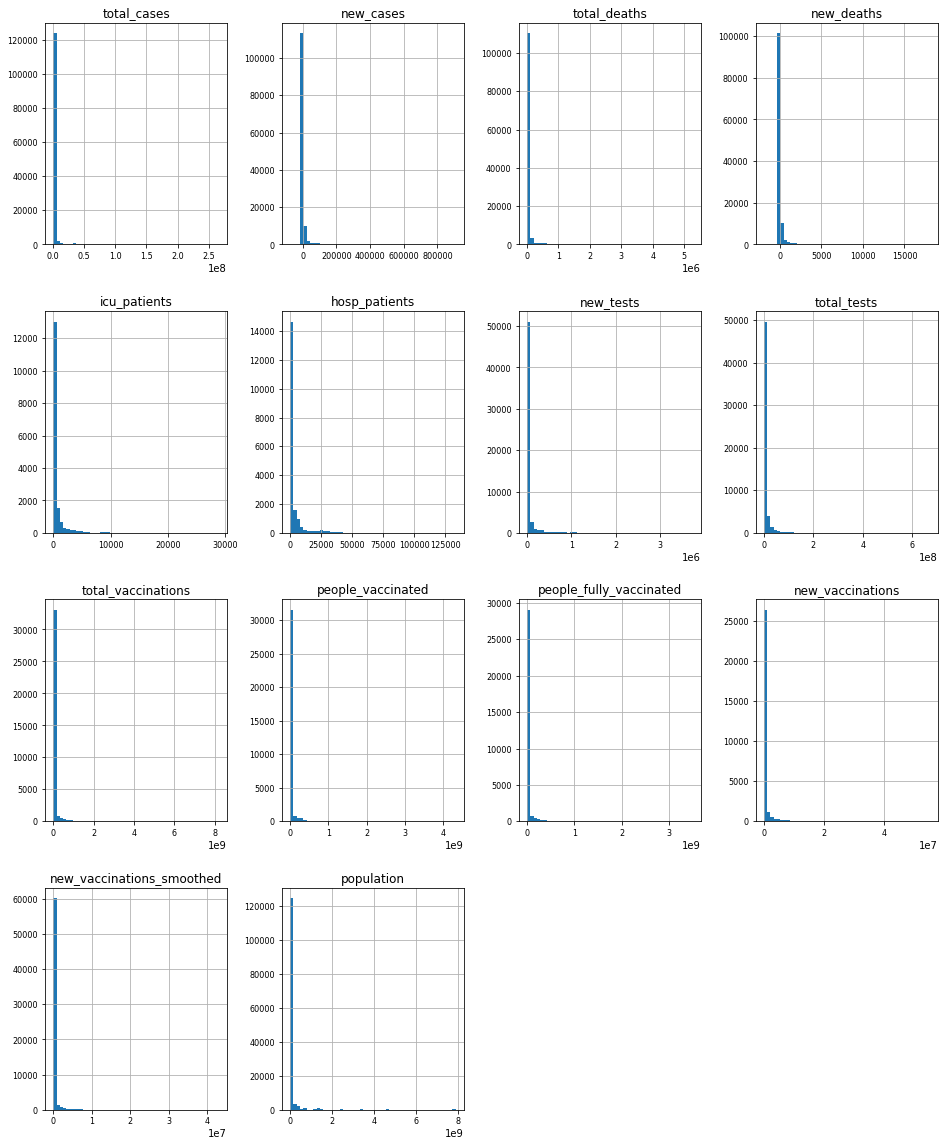

In [27]:
df2.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); 

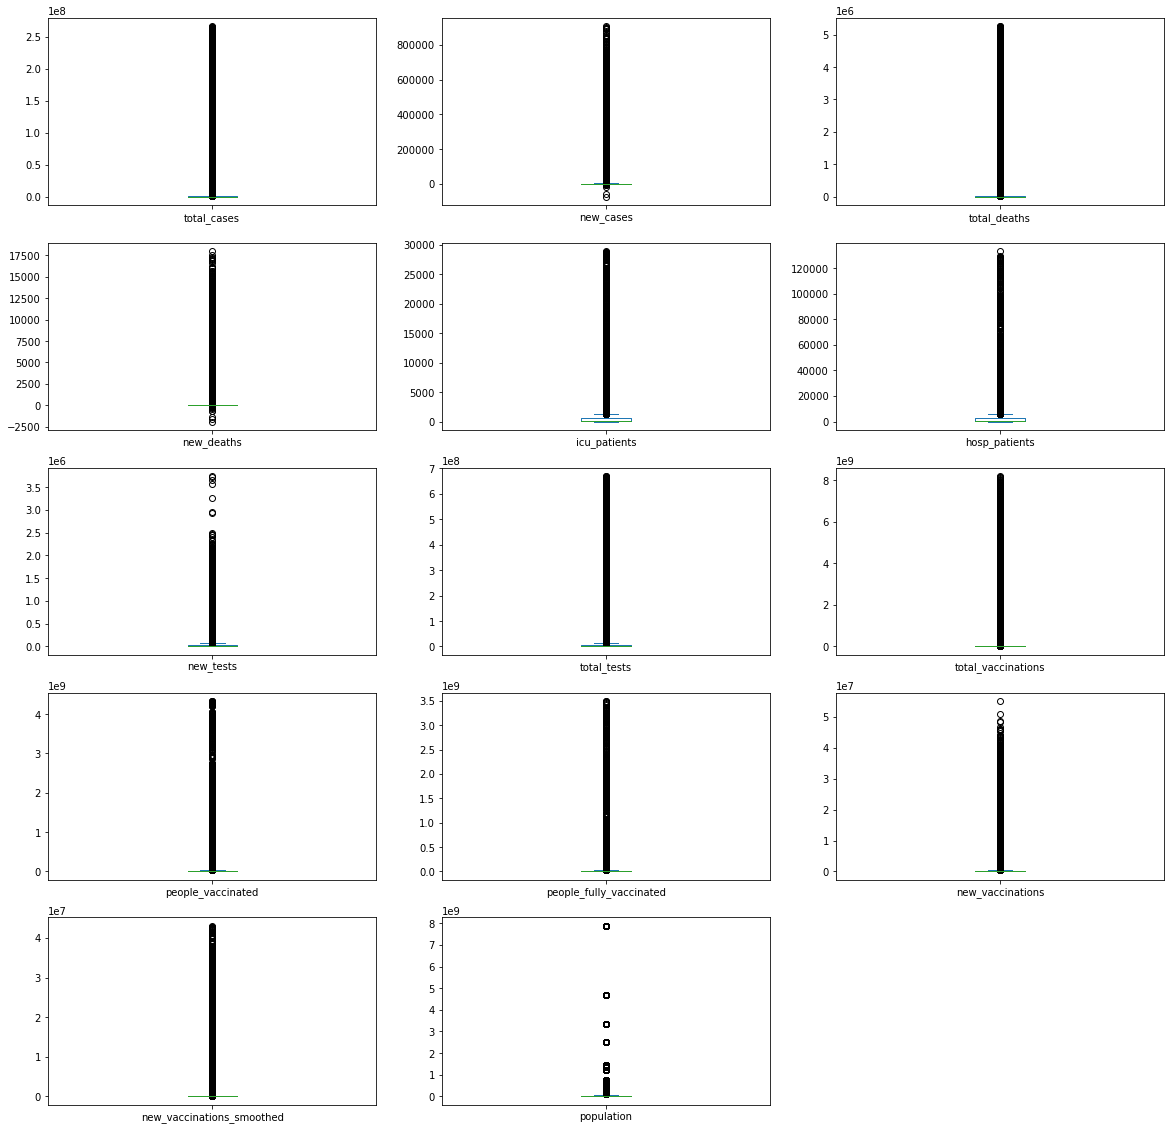

In [28]:
df2.plot(kind = "box" , subplots = True , figsize = (20, 20), layout = (5, 3) )
plt.show()

# Dealing with NULLS

In [29]:
#dropping columns that will not be relevant with greater than 80% null values
df_nan = df2.copy()

df_nan = df_nan.drop(columns = ['icu_patients', 'hosp_patients', 'tests_units']) #'continent'])

In [30]:
#dropping rows that has low number of null values

df_nan.dropna(subset=['population'], inplace = True)

In [31]:
#Last observation carried forward (LOCF) use the last valid observation to fill the missing value

df_nan["total_cases"] = df_nan["total_cases"].fillna(method='backfill')
df_nan["new_cases"] = df_nan["new_cases"].fillna(method='backfill')
df_nan["new_deaths"] = df_nan["new_deaths"].fillna(method='backfill')
df_nan["total_deaths"] = df_nan["total_deaths"].fillna(method='backfill')
df_nan["total_tests"] = df_nan["total_tests"].fillna(method='backfill')
df_nan["continent"] = df_nan["continent"].fillna(method='backfill')




In [32]:
#filling values with interpolation (number between the previous and the next record)
"""
df_nan["total_vaccinations"] = df_nan["total_vaccinations"].fillna(method='backfill')
df_nan["people_vaccinated"] = df_nan["people_vaccinated"].fillna(method='backfill')
df_nan["people_fully_vaccinated"] = df_nan["people_fully_vaccinated"].fillna(method='backfill')
df_nan["new_vaccinations"] = df_nan["new_vaccinations"].fillna(method='backfill')
df_nan["new_vaccinations_smoothed"] = df_nan["new_vaccinations_smoothed"].fillna(method='backfill')

"""
df_nan["total_vaccinations"] = df_nan["total_vaccinations"].interpolate(method='linear', limit_direction='forward', axis=0)
df_nan["people_vaccinated"] = df_nan["people_vaccinated"].interpolate(method='linear', limit_direction='forward', axis=0)
df_nan["people_fully_vaccinated"] = df_nan["people_fully_vaccinated"].interpolate(method='linear', limit_direction='forward', axis=0)
df_nan["new_vaccinations"] = df_nan["new_vaccinations"].interpolate(method='linear', limit_direction='forward', axis=0)
df_nan["new_vaccinations_smoothed"] = df_nan["new_vaccinations_smoothed"].interpolate(method='linear', limit_direction='forward', axis=0)
df_nan["new_tests"] = df_nan["new_tests"].interpolate(method='linear', limit_direction='forward', axis=0)


In [33]:
df_nan.dropna(subset=['total_vaccinations'], inplace = True)
df_nan.dropna(subset=['people_vaccinated'], inplace = True)
df_nan.dropna(subset=['people_fully_vaccinated'], inplace = True)
df_nan.dropna(subset=['people_fully_vaccinated'], inplace = True)
df_nan.dropna(subset=['new_vaccinations_smoothed'], inplace = True)
df_nan.dropna(subset=['new_vaccinations'], inplace = True)
df_nan.dropna(subset=['total_tests'], inplace = True)
df_nan.dropna(subset=['new_tests'], inplace = True)



df_nan.isnull().sum().sort_values(ascending=True)

iso_code                     0
continent                    0
location                     0
date                         0
total_cases                  0
new_cases                    0
total_deaths                 0
new_deaths                   0
new_tests                    0
total_tests                  0
total_vaccinations           0
people_vaccinated            0
people_fully_vaccinated      0
new_vaccinations             0
new_vaccinations_smoothed    0
population                   0
dtype: int64

In [34]:
df_nan.shape

(135952, 16)

# Outliers

## I believ that dealing with outliers is of no use as the nature of the distribution of the data is left skewed, as the data is decreasing by time naturally.

# Visualisations and insights

In [156]:
#importing libraries for different visualisations

import matplotlib.pyplot as plt
import plotly.express as px
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as py
from plotly.offline import iplot
from plotly.graph_objs import Scatter

py.init_notebook_mode(connected=True)
cf.go_offline()

In [36]:
#removing negative values

df_nan[df_nan['new_cases'] < 0 ]['date'].index
negatives = [4302,   4612,   9693,  13654,  17776,  25598,  26014,  29098,
             32023,  32229,  33335,  34846,  35560,  35561,  35564,  35683,
             36993,  43188,  43189,  43769,  43772,  43788,  43794,  43819,
             43828,  43829,  43854,  45476,  47239,  52061,  54058,  55221,
             56308,  60397,  60461,  60474,  60895,  61297,  61517,  61671,
             63932,  64934,  70337,  70890,  71716,  71717,  74420,  75239,
             78540,  79026,  80098,  82536,  85626,  87345,  88926,  88934,
             89204,  89306,  90273,  97282, 100587, 109347, 109471, 109650,
             116557, 116588, 116869, 118372, 121248, 121254, 123155, 123242,
             123278, 123279, 127873, 127906, 130227, 130266, 131869, 136516,
             137671]

df_nan.drop(negatives, inplace = True)

In [157]:
#vreating a dataframe of groupby = countries, to analyse each country's result alone

countries = df_nan.groupby('iso_code').sum()
countries = countries.reset_index()
countries.drop(columns = ['total_cases', 'total_deaths'], inplace = True)

In [56]:
cases = countries.sort_values(by = 'new_cases', ascending = False)
cases.drop([152, 158, 159, 165, 162, 157, 164, 154, 165, 160, 161, 155, 163, 153, 156], inplace = True)

deaths = countries.sort_values(by = 'new_deaths', ascending = False)
deaths.drop([152, 158, 159, 165, 157, 162, 164, 154, 165, 160, 161, 155, 163, 153, 156], inplace = True)

In [39]:
#creating a dataframe for each country and the number of fully vaccinated people

location_list = df_nan['location'].unique()
fully_vaccinated = []

for location in location_list:
    fully_vaccinated.append(df_nan[df_nan['location'] == location]['people_fully_vaccinated'].tail(1).values[0].round(decimals = 2))

df = pd.DataFrame([location_list, fully_vaccinated]).transpose()

#removing rows that contain continents and country classifications
df.drop([231, 11, 223, 123, 91, 68, 155, 194, 69, 1], inplace = True)

In [67]:
#creating a dataframe for the hgihest 20 countries in Covid-19 cases

#cases['iso_code'].head(20).values
contries_list = ['USA', 'IND', 'BRA', 'GBR', 'RUS', 'FRA', 'TUR', 'DEU', 'IRN','ARG', 
                 'ESP', 'ITA', 'COL', 'IDN', 'MEX', 'POL', 'UKR', 'ZAF','PHL', 'NLD']

USA = df_nan[df_nan["iso_code"].str.contains('USA', na = False)]
IND = df_nan[df_nan["iso_code"].str.contains('IND', na = False)]
BRA = df_nan[df_nan["iso_code"].str.contains('BRA', na = False)]
GBR = df_nan[df_nan["iso_code"].str.contains('GBR', na = False)]
RUS = df_nan[df_nan["iso_code"].str.contains('RUS', na = False)]
FRA = df_nan[df_nan["iso_code"].str.contains('FRA', na = False)]
TUR = df_nan[df_nan["iso_code"].str.contains('TUR', na = False)]
DEU = df_nan[df_nan["iso_code"].str.contains('DEU', na = False)]
IRN = df_nan[df_nan["iso_code"].str.contains('IRN', na = False)]
ARG = df_nan[df_nan["iso_code"].str.contains('ARG', na = False)]
ESP = df_nan[df_nan["iso_code"].str.contains('ESP', na = False)]
ITA = df_nan[df_nan["iso_code"].str.contains('ITA', na = False)]
COL = df_nan[df_nan["iso_code"].str.contains('COL', na = False)]
IDN = df_nan[df_nan["iso_code"].str.contains('IDN', na = False)]
POL = df_nan[df_nan["iso_code"].str.contains('POL', na = False)]
UKR = df_nan[df_nan["iso_code"].str.contains('UKR', na = False)]
ZAF = df_nan[df_nan["iso_code"].str.contains('ZAF', na = False)]
PHL = df_nan[df_nan["iso_code"].str.contains('PHL', na = False)]
NLD = df_nan[df_nan["iso_code"].str.contains('NLD', na = False)]
MEX = df_nan[df_nan["iso_code"].str.contains('MEX', na = False)]
EGY = df_nan[df_nan["iso_code"].str.contains('EGY', na = False)]


world = pd.concat([USA, IND, BRA, GBR, RUS, FRA, TUR, DEU, IRN, ARG, 
                   ESP, ITA, COL, IDN, MEX, POL, UKR, ZAF,PHL, NLD])

In [ ]:
#to be able to run the choromap on online notebooks

!pip install chart_studio

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [128]:
import chart_studio.plotly as py
import plotly.graph_objs as go

data = dict(type  = 'choropleth', 
		locations = cases['iso_code'], 
		colorscale = 'rdbu', 
        reversescale = True,
		text = cases['iso_code'], 
		z = cases['new_cases'],
		colorbar = {'title' : 'cases around the world'})

layout = dict(title = 'cases around the world', 
              geo = dict(showframe = False, projection = {'type': 'equirectangular'}))

choromap = go.Figure(data = [data], layout = layout)
iplot(choromap) 

py.plot(choromap, filename = 'maaap', auto_open = False)

'https://plotly.com/~aloshism/36/'

In [129]:
x = world['date']
y = world['total_cases']

fig = px.line(world, 
              x = x, 
              y = y, 
              color='location' ,
              line_shape="spline", 
              render_mode="svg", 
              title='Top 20 countries in total number cases',
              labels=dict(x="Date", y="total number of cases"))
fig.show()

'https://plotly.com/~aloshism/38/'

#### USA, India and Brazil have the highest number of total cases

In [130]:
Total_Cases = df_nan[df_nan['location'] == 'World']['total_cases']
Date = df_nan[df_nan['location'] == 'World']['date']

fig = px.line(df_nan, 
              x = Date , 
              y = Total_Cases ,
              line_shape="spline", 
              render_mode="svg", 
              title='Total cases in World',
              labels=dict(x="Date", y="total number of cases in World"))
fig.show()

'https://plotly.com/~aloshism/40/'

### the curve for the cases is continuing to grow, as covid-19 is continuously developing new variants

In [131]:
New_Cases = df_nan[df_nan['location'] == 'World']['new_cases']
Date = df_nan[df_nan['location'] == 'World']['date']

fig = px.line(df_nan, 
              x = Date , 
              y = New_Cases ,
              line_shape="spline", 
              render_mode="svg", 
              title='new cases in World',
              labels=dict(x="Date", y="Number of new cases in World"))
fig.show()

'https://plotly.com/~aloshism/42/'

### we can trace the number of cases around the world through the three waves since Oct 2020, and going for the 4th wave by Oct 2021

In [133]:
x = df_nan[df_nan['location'] == 'World']['date']
y = df_nan[df_nan['location'] == 'World']['people_fully_vaccinated']

fig = px.line(df_nan, 
              x = x, 
              y = y ,
              line_shape="spline", 
              render_mode="svg", 
              title='Fully Vaccinated People around the world',
              labels=dict(x="Date", y="Number of Fully vaccinated people"))
fig.show()

'https://plotly.com/~aloshism/44/'

### number of fully vaccinated people started increasing with higher speed starting from the beginning of 2021

In [134]:
x = world[world['date'] > '2021-01-01']['date']
y = world[world['date'] > '2021-01-01']['people_fully_vaccinated']

fig = px.line(world, 
              x = x, 
              y = y, 
              color = world[world['date'] > '2021-01-01']['location'] ,
              line_shape="spline", 
              render_mode="svg", 
              title='vaccination in Top 20 countries',
              labels=dict(x="Date", y="number of fully vaccinated"))
fig.show()

'https://plotly.com/~aloshism/47/'

### India was the highest to vaccinate its population due to the big wave that occured mid-june following the black fungus
### other countries going with normal pace with USA being the 2nd after India

In [125]:
cases_df = cases.head(20)
fig = px.colors.sequential.swatches_continuous()

fig = px.bar(cases_df, 
             x ='iso_code', 
             y='new_cases', 
             color = 'new_cases',  
             color_continuous_scale=px.colors.sequential.Oryel, 
             title='vaccination in the top 20 countries',
             labels=dict(x= "country", y="Death number", color = 'Death Number'),
             barmode="group")
fig.show()

'https://plotly.com/~aloshism/31/'

In [126]:
deaths_df = deaths.head(20)
fig = px.colors.sequential.swatches_continuous()

fig = px.bar(deaths_df, 
             x ='iso_code', 
             y='new_deaths',
             color = 'new_deaths', 
             labels=dict(x= "country", y="Death number", color = 'Death Number'),
             color_continuous_scale=px.colors.sequential.Blugrn , 
             title='COVID-19 death cases according to  countries',
             barmode="group")
fig.show()

'https://plotly.com/~aloshism/29/'

In [127]:
sorted_df = df.sort_values(by = 1, ascending = False).head(20)

fig = px.bar(sorted_df, 
             x = 0, 
             y = 1, 
             title='Numbers of fully vaccinated people in each country',
             labels=dict(x= "country", y="number of fully vaccinated", color = 'Country'),
             color = 0)
fig.show()

'https://plotly.com/~aloshism/34/'

In [121]:
fig = px.scatter(USA, 
                 x="people_fully_vaccinated", 
                 y="new_cases", 
                 color="new_deaths",
                 hover_name="iso_code", 
                 log_x= True, 
                 title='number of new cases relevance to number of vaccinated people -USA-',
                 color_continuous_scale=px.colors.sequential.Plasma,
                 labels=dict(x="number of fully vaccinate", y="number of cases", color = 'Death number'))
fig.show()

'https://plotly.com/~aloshism/24/'

In [120]:
y = df_nan[df_nan['location'] == 'World']['new_cases']
x = df_nan[df_nan['location'] == 'World']['people_fully_vaccinated']

fig = px.scatter(USA, 
                 x=x, 
                 y=y, 
                 color="new_deaths",
                 hover_name=y, 
                 log_x= True, 
                 color_continuous_scale=px.colors.sequential.Plasma,
                 title='number of new cases relevance to number of vaccinated people -WORLD-',
                 labels=dict(x="number of fully vaccinate", y="number of cases", color = 'Death number'))
fig.show()

'https://plotly.com/~aloshism/22/'

### we can see the effect of vaccinating people on lowering the number of new cases (both in USA and World) and the effect it has on decreasing deaths numbers
### but now as we are going through the 4th wave, and the new emerging covid-19 variants, vaccination's effect becoming lower

In [118]:
x = df_nan[df_nan['location'] == 'World']['new_cases'].sum()
y = df_nan[df_nan['location'] == 'World']['new_deaths'].sum()

fig = px.pie(df_nan, values=[x, y], color = [x, y], title='Percentage of Cases to Death')
fig.show()

'https://plotly.com/~aloshism/18/'

### we can see the ratio of death cases to new cases ratio is very low

In [113]:
fig = px.sunburst(world, 
                  path=['continent', 'iso_code'], 
                  values='new_cases',
                  color='location', 
                  hover_data=['new_cases'])
fig.show()

'https://plotly.com/~aloshism/8/'

### the distribution of new cases according to the continents

In [114]:
y = world['new_cases']
x = world['new_tests']

fig = px.scatter(world, 
                 x=x, 
                 y=y, 
                 color="new_cases",
                 hover_name=y, 
                 log_x= True, 
                 color_continuous_scale=px.colors.sequential.Aggrnyl,
                 title='effect of performing more tests on revealing new cases',
                 labels=dict(x="number of tests", y="number of cases", color = 'Death number'))
fig.show()

'https://plotly.com/~aloshism/5/'

### increasing to the number of tests performed on people for covid-19 reveals greater number of cases so we could have more accurate data and representations so governments can deal with it

In [115]:
x = EGY[EGY['date'] > '2021-01-01']['date']
y = EGY[EGY['date'] > '2021-01-01']['new_vaccinations']

fig = px.line(EGY, 
              x = x, 
              y = y, 
              color= EGY[EGY['date'] > '2021-01-01']['location'] ,
              line_shape="spline", 
              render_mode="svg", 
              title='vaccination progress in egypt',
             labels=dict(x="Date", y="vaccination"))
fig.show()

'https://plotly.com/~aloshism/13/'

### Egypt started vaccinating more people throught the third wave (August 2021)

In [116]:
x = EGY[EGY['date'] > '2021-01-01']['date']
y = EGY[EGY['date'] > '2021-01-01']['people_fully_vaccinated']

fig = px.line(EGY, 
              x = x, 
              y = y, 
              color= EGY[EGY['date'] > '2021-01-01']['location'] ,
              line_shape="spline", 
              render_mode="svg", 
              title='vaccination progress in egypt',
             labels=dict(x="Date", y="vaccination"))
fig.show()

'https://plotly.com/~aloshism/15/'

In [117]:
x = EGY['date']
y = EGY['total_cases']

fig = px.line(EGY, 
              x = x, 
              y = y, 
              color= EGY['location'] ,
              line_shape="spline", 
              render_mode="svg", 
              title='new_cases in egypt',
             labels=dict(x="Date", y="vaccination"))
fig.show()

'https://plotly.com/~aloshism/3/'

# MODELS
## Linear Regression

In [136]:
df_nan = df_nan.drop(columns = ['continent',  'new_vaccinations_smoothed', 'date'])

In [137]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_model = df_nan.copy()

df_model['iso_code'] = label_encoder.fit_transform(df_model['iso_code'])
df_model['location'] = label_encoder.fit_transform(df_model['location'])

In [138]:
#Linear regression model
from sklearn.model_selection import train_test_split

X = df_model.drop("new_cases" , axis = 1).values
y = df_model['new_cases'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [139]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler ()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

In [140]:
from sklearn.linear_model import LinearRegression


lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [141]:
lr.score(X_train,y_train)

0.8986248163399122

In [142]:
lr.score(X_test,y_test)

0.8906328229961042

## Ridge Regression

In [146]:
from sklearn.linear_model import Ridge
rid = Ridge()

In [147]:
rid.fit(X_train,y_train)

Ridge()

In [148]:
rid.score(X_train,y_train)

0.8986247927032969

In [149]:
rid.score(X_test,y_test)

0.890634497312274

## Lasso Regression

In [150]:
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 


C:\Users\Olaaaaz\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 488191490187.94336, tolerance: 17729740222.6741



Lasso(alpha=0.01)

In [151]:
pred_train_lasso= model_lasso.predict(X_train)

In [152]:
model_lasso.score(X_train,y_train)

0.8986248162949637

In [153]:
pred_test_lasso= model_lasso.predict(X_test)

In [154]:
model_lasso.score(X_test,y_test)

0.8906328799727194

### visualising the results

In [1013]:
y_pred = lr.predict(X_test)
y_pred2 = rid.predict(X_test)

In [1014]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test , y_pred)
r2

0.8910947542296778

In [ ]:
import statsmodels.api as sm
from scipy import stats
X2 = sm.add_constant(X)
est = sm.OLS(y,X2)
est2 = est.fit()
est2.summary()

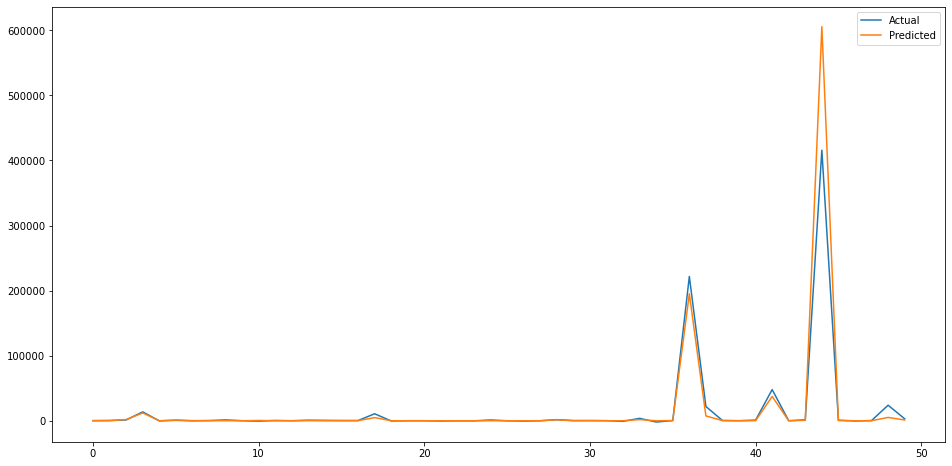

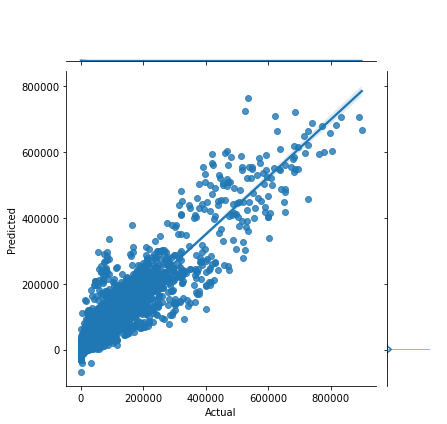

In [155]:
y_pred = lr.predict(X_test)
test = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

## KNN